# Absolute Discounting Probability Mass

In [1]:
import matplotlib.pyplot as plt
from absolute_discounting import *

In [11]:
words = tokenize(EXAMPLE_TEXT, 3)
unigram_counts = count_ngrams(words, 1)
bigram_counts = count_ngrams(words, 2)
trigram_counts = count_ngrams(words, 3)

# Maximum Likelihood Estimation
$p(w_i | w_{i-2}, w_{i-1}) = \frac{c(w_{i-2}, w_{i-1}, w_i)}{\sum_{w}c(w_{i-2}, w_{i-1}, w)}$

In words:

$p(\text{some NGram } (abc)) = \frac{\text{count of } (abc)}{\sum{\text{count of each trigram } (***)}}$

Since MLE uses only the highest-order NGram (in this example, trigrams), the probability of those trigrams should sum to 1

In [3]:
def p_mle(target_ngram, ngram_counts):
    target_count = ngram_counts[target_ngram]
    sum_ngram_counts = sum(ngram_counts.values())
    return target_count / sum_ngram_counts

Probability of a single trigram:

In [4]:
p_mle(("a", "paragraph", "is"), trigram_counts)

0.023952095808383235

Sum of probabilities of all trigrams:

In [5]:
trigrams = trigram_counts.keys()
sum_trigram_probabilities = round(sum([p_mle(trigram, trigram_counts) for trigram in trigrams]), 3)
sum_trigram_probabilities

1.0

The whole probability space is filled by the highest-order (trigram) estimation:

[]

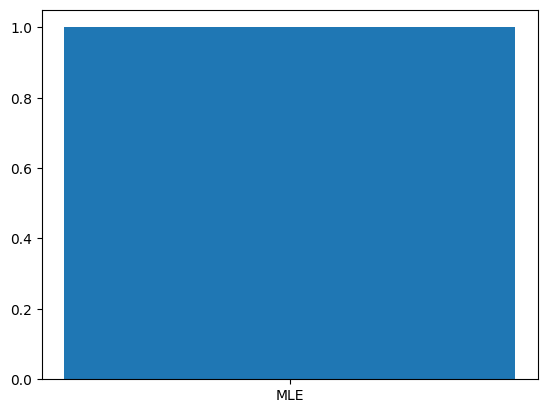

In [6]:
labels = ["MLE"]
probability_mass = [sum_trigram_probabilities]

fig, ax = plt.subplots()
ax.bar(labels, probability_mass)
ax.plot()

# Absolute Discounting

$p_{ABS}(w_i|w^{i-1}_{i-N+1}) = \frac{max\{c(w^{i}_{i-N+1}) - D, 0\}}{\sum_{w_i}{c(w^i_{i-N+1})}} + \lambda(w^{i-1}_{i-N+1}) \; p_{ABS}(w_i|w^{i-1}_{i-N+2})$

<sub>$D$ is a constant, pre-selected discount value</sub>

<sub>$N$ is the order of the NGram (for a trigram, N=3)</sub>

In words:

$p_{ABS}(\text{some NGram } (abc)) = \frac{max\{ (\text{count of }(abc) - \text{discount}), 0 \} }{\sum{\text{count of each NGram } (***)}} + (\text{lambda function of history } (ab)) * (p_{ABS}(\text{next-order NGram}))$

$\lambda$ is a function that assigns weight to the lower-order NGrams.

It's not clear to me that $\lambda$ is actually a function of the history.


Highest-order portion of $p_{ABS}$:

In [7]:
ABSOLUTE_DISCOUNT = 0.5

def p_abs_highest_order(target_ngram, ngram_counts):
    target_count = ngram_counts[target_ngram]
    discounted_target_count = target_count - ABSOLUTE_DISCOUNT
    discounted_target_count = max(discounted_target_count, 0)

    sum_ngram_counts = sum(ngram_counts.values())
    return discounted_target_count / sum_ngram_counts

Probability of a single trigram:

In [8]:
p_abs_highest_order(("a", "paragraph", "is"), trigram_counts)

0.020958083832335328

Sum of probabilities of all trigrams:

In [9]:
trigrams = trigram_counts.keys()
sum_trigram_probabilities = round(sum([p_abs_highest_order(trigram, trigram_counts) for trigram in trigrams]), 3)
sum_trigram_probabilities

0.566

So almost half our probability mass is reserved for the lower-order NGrams.

In [13]:
bigrams = bigram_counts.keys()
sum_bigram_probabilities = round(sum([p_abs_highest_order(bigram, bigram_counts) for bigram in bigrams]), 3)

unigrams = unigram_counts.keys()
sum_unigram_probabilities = round(sum([p_abs_highest_order(unigram, unigram_counts) for unigram in unigrams]), 3)

print("bigram mass", sum_bigram_probabilities)
print("unigram mass", sum_unigram_probabilities)

bigram mass 0.613
unigram mass 0.769


And we have to squash these probability sums into the area we have left. That's what $\lambda$ is for.